<a href="https://colab.research.google.com/github/31AKASh07/Playstore-App-analysis/blob/main/PLAYSTORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name**    - PLAYSTORE REVIEW ANALYSIS



**Project Type**-EDA


**Contribution**-Individual

# **Project Summary -**

# **GitHub Link -** https://github.com/31AKASh07/Playstore-App-analysis

# **Problem Statement**


## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

Naming Play Store Data as PSD And User Review as UR

In [3]:
path_PSD=("/content/drive/MyDrive/Play Store App Review Analysis/Dataset/Play Store Data.csv")
path_UR=("/content/drive/MyDrive/Play Store App Review Analysis/Dataset/User Reviews.csv")
PSD=pd.read_csv(path_PSD)
UR=pd.read_csv(path_UR)

In [4]:
PSD.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
PSD.shape

(10841, 13)

In [6]:
PSD.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
PSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
PSD.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Dropping not so useful columns for our analysis



In [9]:
PSD.drop(["Last Updated","Current Ver","Android Ver","Genres"],inplace=True,axis=1)

Looking for the types of data we have

In [10]:
PSD.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

Checking for null values

In [11]:
PSD.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

# Removing the null values from the data as they are redundant for our analysis

In [12]:
PSD=PSD.dropna()


In [13]:
PSD.shape

(9366, 9)

We cannot drop these null values as they are in large numbers so we will take mean of rating and will fill the NAN value with that.

In [14]:
Mean_of_ratings=PSD['Rating'].mean()
PSD['Rating'].fillna(Mean_of_ratings,inplace=True)

In [15]:
PSD.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

Confirming if any null values exist

In [16]:
PSD.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
dtype: bool

In [17]:
PSD['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [18]:
PSD["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [19]:
PSD.Price = PSD.Price.apply(lambda x:x.replace("$",""))
PSD.Price = PSD.Price.apply(lambda x:x.replace("Everyone","0"))
PSD.Price = PSD.Price.apply(lambda x:float(x))


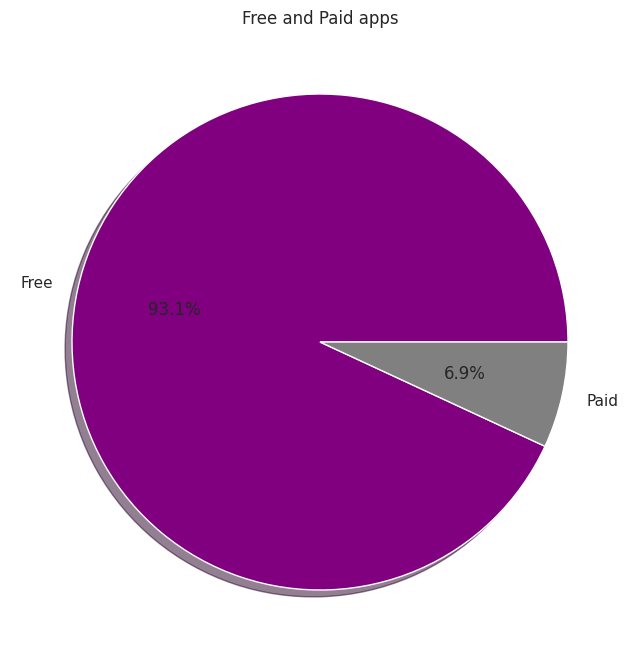

In [34]:
App_Type=["Free","Paid"]
plt.figure(figsize=(8,10))
plt.title('Free and Paid apps')
no_of_apps=[8719,647]
plt.pie(no_of_apps,colors=['Purple','grey'],labels=(App_Type), shadow=True,autopct="%2.1f%%",)
plt.show()


**Average** rating of the apps

In [21]:
PSD['Rating'].mean()

4.191757420456972

In [22]:
PSD


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0.0,Everyone
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+


Plotting the BarChart to see the no of app distribution on category basis.


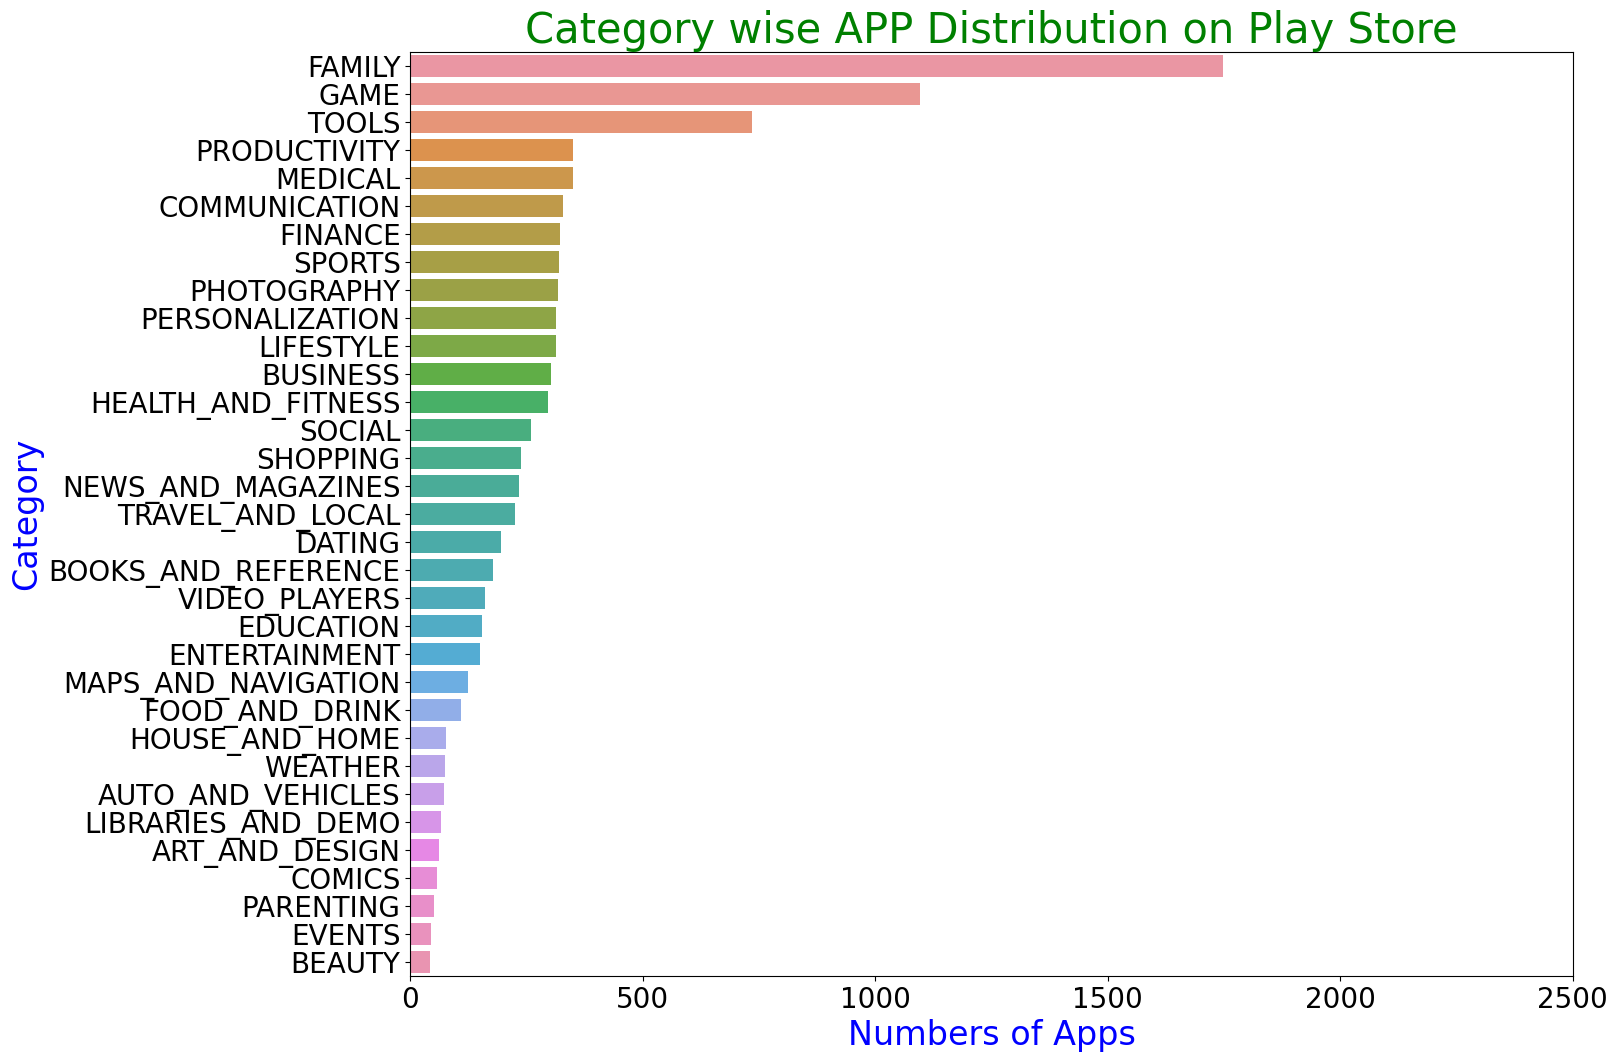

In [23]:
plt.figure(figsize=(15,12))
unique_category= PSD['Category'].value_counts()
sns.barplot(x=unique_category, y=unique_category.index, data=PSD)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(0,2500)
plt.xlabel("Numbers of Apps",size=24,c="b")
plt.ylabel("Category",size=24,c="b")
plt.title("Category wise APP Distribution on Play Store",size=30,c="g")
plt.show()




*   Family,Games and Tools are the Major category on the app stores





In [35]:
PSD['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

#Everyone 10+ is same as Everyone and Adults only 18+ is same as Mature 17+
#so we will fix this by using replace function.


In [39]:
PSD['Content Rating']=PSD['Content Rating'].replace('Everyone 10+','Everyone');
PSD['Content Rating'] = PSD['Content Rating'].replace('Adults only 18+','Mature 17+');

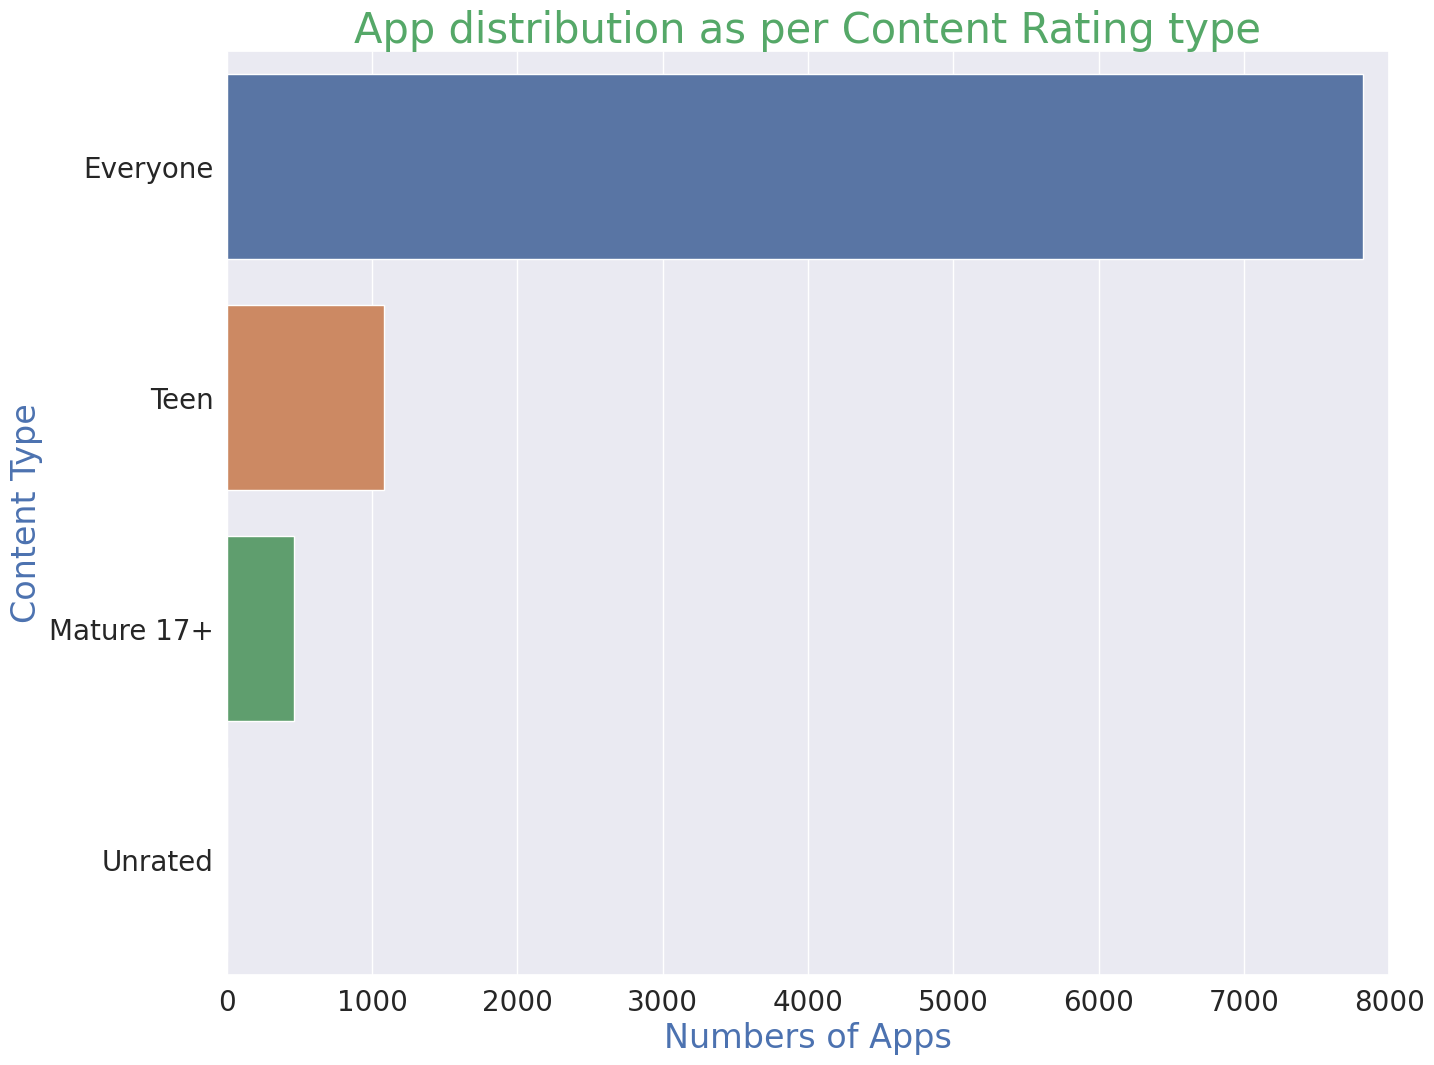

In [40]:
plt.figure(figsize=(15,12))
unique_category= PSD['Content Rating'].value_counts()
sns.barplot(x=unique_category, y=unique_category.index, data=PSD)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlim(0,8000)
plt.xlabel("Numbers of Apps",size=24,c="b")
plt.ylabel("Content Type",size=24,c="b")
plt.title("App distribution as per Content Rating type",size=30,c="g")
plt.show()

Above chart shows that a large number of apps are for general purpose to be used by everyone and other niche category have limited no of apps on playstore.

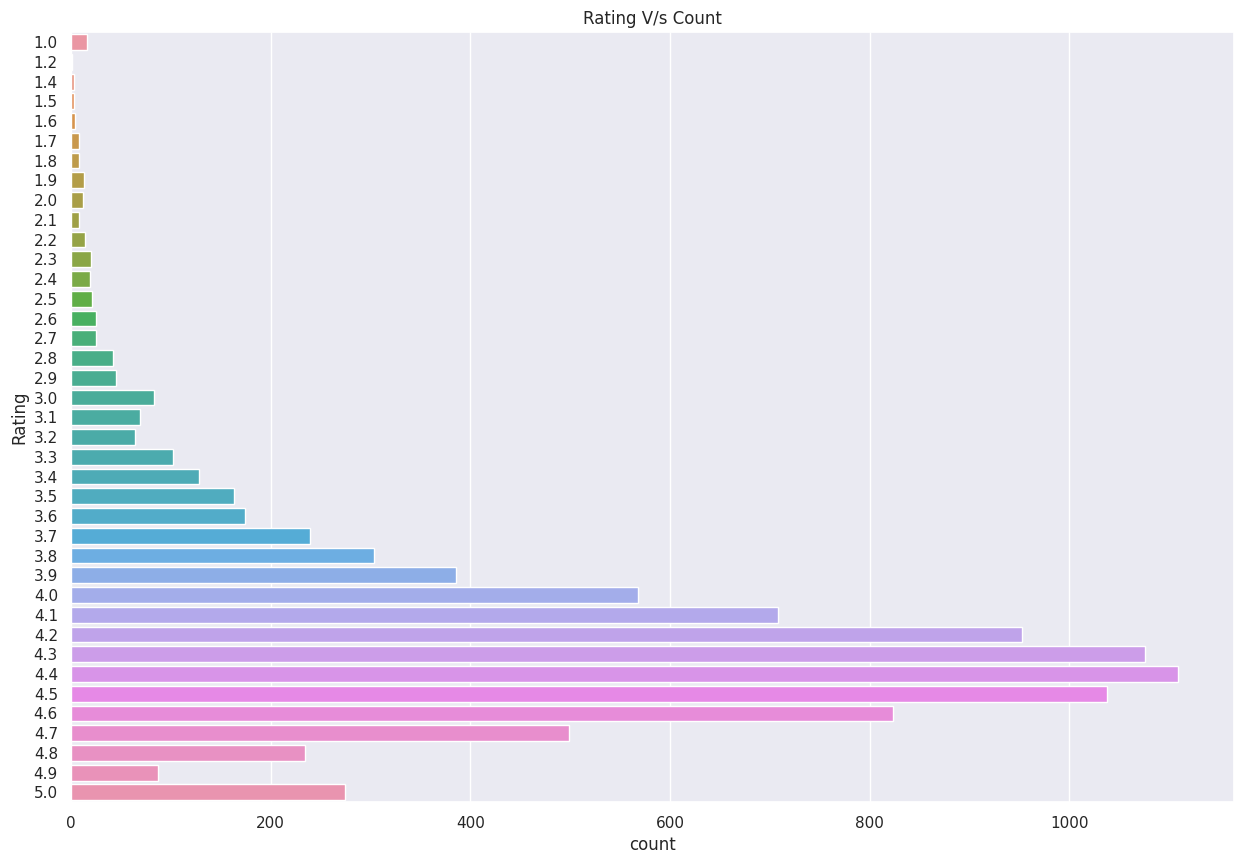

In [41]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
plt.xticks
plt.title("Rating V/s Count")
ax = sns.countplot(y="Rating", data=PSD)

# From above charts we can infer that most of the apps have rating between 4 and 4.7

Text(0.5, 1.0, 'Category & Price')

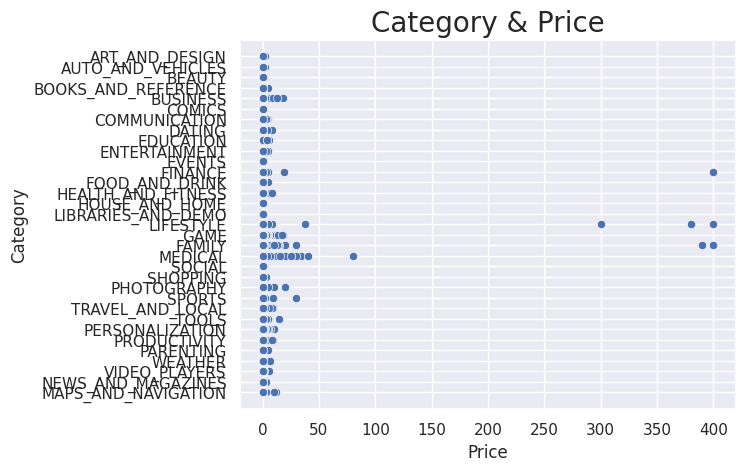

In [42]:
sns.scatterplot(data = PSD, y = "Category", x = "Price")
plt.title("Category & Price", size=20)


Exlporing the USER REVIEW DATA

In [43]:
UR.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [44]:
UR.shape#we have 64295 reviews

(64295, 5)

In [45]:
UR.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [46]:
UR['Sentiment'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Positive
1        Positive
2             NaN
3        Positive
4        Positive
           ...   
64290         NaN
64291         NaN
64292         NaN
64293         NaN
64294         NaN
Name: Sentiment, Length: 64295, dtype: object>

In [47]:
PSD['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)